# Automatize visualization of actual IMF forecast with Quandl

This code shows how to automatize charts with forecast of gdp and cpi for CE countries. The same can be done also for other indicators forecasted by IMF, and also for forecasts of other instituons downloadable from Quandl database. For more check quandl.com

In [7]:
from matplotlib import pyplot
import pandas as pd
import quandl
from datetime import date, timedelta

In [10]:
quandl.ApiConfig.api_key = 'YOUR KEY'       #Insert your quandl key here

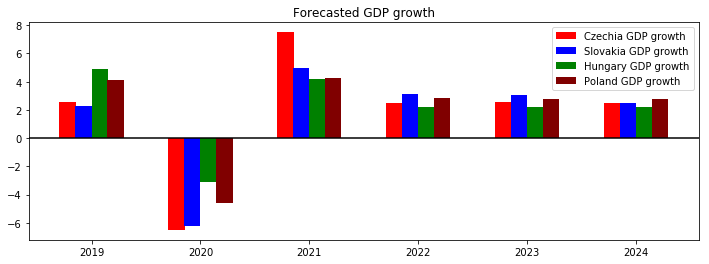

In [11]:
start_date = (date.today()-timedelta(days=(365*2))).isoformat()       #I want the start two years ago

#Lets download the data 

cz_gdp_imf_forecast=quandl.get('ODA/CZE_NGDP_RPCH', start_date=start_date)
hu_gdp_imf_forecast=quandl.get('ODA/HUN_NGDP_RPCH', start_date=start_date)
pl_gdp_imf_forecast=quandl.get('ODA/POL_NGDP_RPCH', start_date=start_date)
sk_gdp_imf_forecast=quandl.get('ODA/SVK_NGDP_RPCH', start_date=start_date)


#IMF reports data on yearly basis. Lets process the index to yearly basis too

cz_gdp_imf_forecast.index = pd.to_datetime(cz_gdp_imf_forecast.index).year
sk_gdp_imf_forecast.index = pd.to_datetime(sk_gdp_imf_forecast.index).year
hu_gdp_imf_forecast.index = pd.to_datetime(hu_gdp_imf_forecast.index).year
pl_gdp_imf_forecast.index = pd.to_datetime(pl_gdp_imf_forecast.index).year


#Lets do dataframe

df_gdp = pd.DataFrame({
        'cz_gdp':cz_gdp_imf_forecast['Value'],
        'sk_gdp':sk_gdp_imf_forecast['Value'],
        'hu_gdp':hu_gdp_imf_forecast['Value'],
        'pl_gdp':pl_gdp_imf_forecast['Value']
        })



index = df_gdp.index      #creates one index for our chart
width = 0.15              #width of the columns in our chart      
  
    
#Lets do the chart

pyplot.bar(index-0.22, df_gdp['cz_gdp'], width,label="Czechia GDP growth",color="red") 
pyplot.bar(index-0.075, df_gdp['sk_gdp'], width,label="Slovakia GDP growth",color="blue") 
pyplot.bar(index+0.075, df_gdp['hu_gdp'], width,label="Hungary GDP growth",color="green") 
pyplot.bar(index+0.22, df_gdp['pl_gdp'], width,label="Poland GDP growth",color="maroon") 
pyplot.gcf().set_size_inches((12, 4))   
pyplot.legend()
pyplot.title('Forecasted GDP growth (IMF)')
pyplot.axhline(y=0, color="black")
pyplot.show()

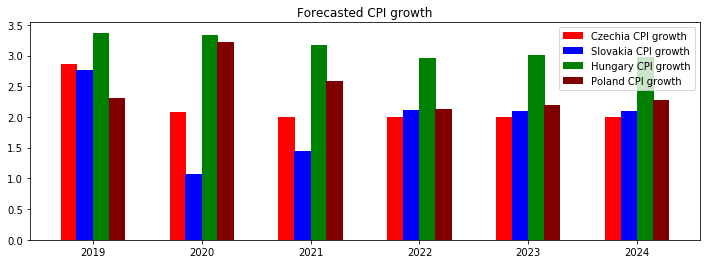

In [12]:
#Now lets do the same for CPI forecast

cz_cpi_imf_forecast=quandl.get('ODA/CZE_PCPIPCH', start_date=start_date)
sk_cpi_imf_forecast=quandl.get('ODA/SVK_PCPIPCH', start_date=start_date)
pl_cpi_imf_forecast=quandl.get('ODA/POL_PCPIPCH', start_date=start_date)
hu_cpi_imf_forecast=quandl.get('ODA/HUN_PCPIPCH', start_date=start_date)

cz_cpi_imf_forecast.index = pd.to_datetime(cz_cpi_imf_forecast.index).year
sk_cpi_imf_forecast.index = pd.to_datetime(sk_cpi_imf_forecast.index).year
hu_cpi_imf_forecast.index = pd.to_datetime(hu_cpi_imf_forecast.index).year
pl_cpi_imf_forecast.index = pd.to_datetime(pl_cpi_imf_forecast.index).year

df_cpi = pd.DataFrame({
        'cz_cpi':cz_cpi_imf_forecast['Value'],
        'sk_cpi':sk_cpi_imf_forecast['Value'],
        'hu_cpi':hu_cpi_imf_forecast['Value'],
        'pl_cpi':pl_cpi_imf_forecast['Value']
        })

pyplot.bar(index-0.22, df_cpi['cz_cpi'], width,label="Czechia CPI growth",color="red") 
pyplot.bar(index-0.075, df_cpi['sk_cpi'], width,label="Slovakia CPI growth",color="blue") 
pyplot.bar(index+0.075, df_cpi['hu_cpi'], width,label="Hungary CPI growth",color="green") 
pyplot.bar(index+0.22, df_cpi['pl_cpi'], width,label="Poland CPI growth",color="maroon") 
pyplot.gcf().set_size_inches((12, 4)) 
pyplot.legend()
pyplot.title('Forecasted CPI growth (IMF)')
pyplot.show()